<a href="https://colab.research.google.com/github/sergfer26/Seminario-Deep-Reinforcement-Learning/blob/master/clase3/pytorch_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Componentes de una red Neuronal con Pytorch 

## Funciones de activación

### Sigmoid

Es una función $f: \mathbb{R}\rightarrow [0, 1]$ dada por 

$$f(x) = \frac{1}{1 +e^{-x}}$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  after removing the cwd from sys.path.


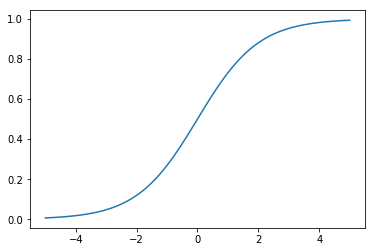

In [0]:
import torch 
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()


### Tanh

Es una función $f: \mathbb{R}\rightarrow [-1, 1]$ dada por 

$$f(x) = \frac{e^x -e^{-x}}{e^{x} +e^{-x}}$$

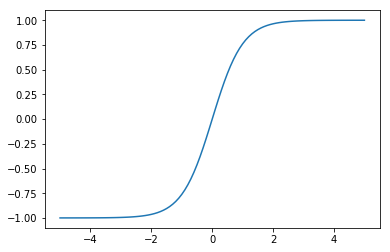

In [0]:
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### ReLU
La función ReLU debe su nombre al termino *rectified linear unit*, es una de la funciones de activación que han obtenido importantes resultados en tiempos recientes.

$$f(x) = \max(0, x)$$


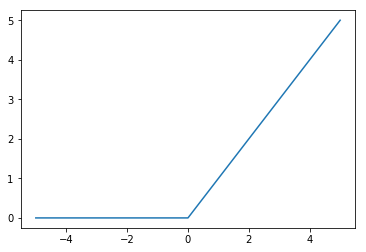

In [0]:
relu = torch.nn.ReLU()
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

Su versión paramétrica llamada  *PReLU* esta dado por 
$$f(x) = \max(x, ax)$$

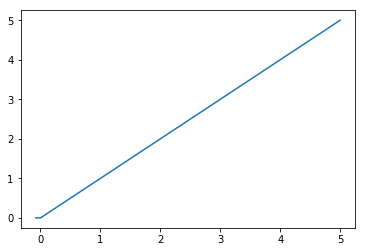

In [0]:
prelu = torch.nn.PReLU(num_parameters=1)
x = prelu(x)
plt.plot(x.detach().numpy(), y.numpy())
plt.show()

### Softmax

Es una función muy útil para la interpretación de valores para clasificación multiclase, esta función esta dada por

$$softmax(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{k}e^{x_j}},$$

note que esta función se puede pensar como la función de densidad discreta de una variable aleatorai.

In [0]:
softmax = torch.nn.Softmax(dim=1)
x = torch.rand(1, 3)
y = softmax(x)
print(x)
print(y)
print(torch.sum(y, dim=1))

tensor([[0.7253, 0.8037, 0.5478]])
tensor([[0.3426, 0.3705, 0.2869]])
tensor([1.])


## Función de costos

### Mean Squared Error Loss (MSE)

Para problemas de regresión donde $\hat{y}$ es un valor estimado y $y$ es la etiqueta, calculamos el error por medio de la siguiente función

$$L(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}(y-\hat y)^2$$

In [0]:
import torch.nn as nn

mse_loss = nn.MSELoss()
yhat = torch.rand(3, 5, requires_grad = True)
y = torch.rand(3, 5)
loss = mse_loss(y, yhat)
print(loss)

tensor(0.1836, grad_fn=<MeanBackward0>)


### Categorical Cross-Entropy Loss

Una función usada para la clasificación multiclase. Suponiendo que $y$ y $\hat y$ siguen una distribución multinomial de tamaño $n$, la función de costos nos dirá que tan distintos son ambos resultados

$$L(y, \hat{y}) = - \sum_{i=1}^n y_i \log(\hat{y_i}) $$

In [0]:
ce_loss = nn.CrossEntropyLoss()
yhat = torch.rand(3, 5, requires_grad = True)
y = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(yhat, y)
print(loss)

tensor(1.7573, grad_fn=<NllLossBackward>)


## Binary Cross-Entropy Loss 

Es el caso particular de la función anterior, se usa cuando únicamente trabajamos con dos clases.

In [0]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
ps = sigmoid(torch.rand(4, 1, requires_grad=True)) # probabilidades
y = torch.tensor([1, 0, 1, 0],  dtype=torch.float32).view(4, 1)
loss = bce_loss(ps, y)
print(ps)
print(loss)

tensor([[0.6713],
        [0.6310],
        [0.5128],
        [0.5977]], grad_fn=<SigmoidBackward>)
tensor(0.7435, grad_fn=<BinaryCrossEntropyBackward>)
